<a href="https://colab.research.google.com/github/Lizochka1511/Valuk/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0%D0%A0%D0%BE%D0%B1%D0%BE%D1%82%D0%B06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Таблиця вихідних даних x: [-2 -1  0  1]
Таблиця вихідних даних f(x): [-7  4  1  2]

--- Наближені значення функції f(x) (точність 0.001) ---
f(-3.0) ≈ -50.0
f(-1.5) ≈ 1.375
f(0.5) ≈ -0.125
f(1.5) ≈ 9.625


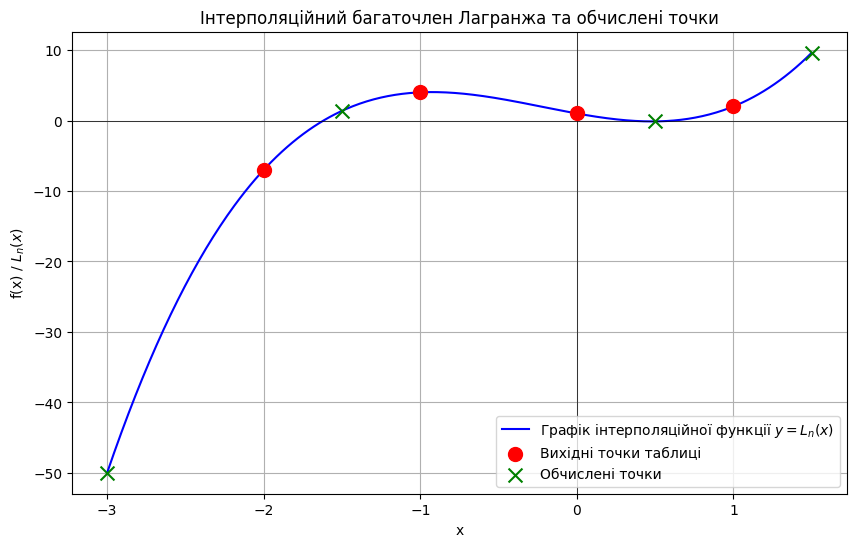

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from numpy.polynomial import Polynomial

# Дані з таблиці (Варіант №1)
x_points = np.array([ -2, -1, 0, 1])
y_points = np.array([ -7, 4, 1, 2])

# Задані точки для обчислення
x_target_points = np.array([ -3, -1.5, 0.5, 1.5])
tolerance = 0.001

print(f"Таблиця вихідних даних x: {x_points}")
print(f"Таблиця вихідних даних f(x): {y_points}\n")

# --- 1. Побудова інтерполяційного багаточлена Лагранжа L_n(x) ---
# Функція lagrange() повертає об'єкт полінома
L_n = lagrange(x_points, y_points)

# Виведемо коефіцієнти полінома (для довідки)
# poly_coeffs = Polynomial(L_n.coef[::-1]).coef
# print(f"Коефіцієнти полінома Лагранжа (від старшого степеня до молодшого): {poly_coeffs}\n")

# --- 2. Обчислення наближених значень функції в заданих точках ---
# Застосовуємо отриманий поліном до цільових точок
f_approx_values = L_n(x_target_points)

print(f"--- Наближені значення функції f(x) (точність {tolerance}) ---")
for i, x_val in enumerate(x_target_points):
    # Округлюємо результат до потрібної точності
    rounded_val = round(f_approx_values[i], len(str(tolerance).split('.')[1]))
    print(f"f({x_val}) ≈ {rounded_val}")

# --- 3. Побудова графіка інтерполяційної функції y = L_n(x) ---

# Діапазон x для гладкого графіка (включаємо всі точки, від -3 до 1.5)
x_plot = np.linspace(min(min(x_points), min(x_target_points)),
                     max(max(x_points), max(x_target_points)),
                     400)
y_plot = L_n(x_plot)

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_plot, label='Графік інтерполяційної функції $y = L_n(x)$', color='blue')
plt.scatter(x_points, y_points, color='red', zorder=5, label='Вихідні точки таблиці', marker='o', s=100)
plt.scatter(x_target_points, f_approx_values, color='green', zorder=5, label='Обчислені точки', marker='x', s=100)
plt.xlabel('x')
plt.ylabel('f(x) / $L_n(x)$')
plt.title('Інтерполяційний багаточлен Лагранжа та обчислені точки')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()
